In [1]:
# Import libaries
# # As seen in HIEnsembleHindcast/ensemble_analysis.ipynb by L.Barnard ()
# import HUXt as H
# #import HIEnsembleHindcast as heh
# #import HI_analysis as hip
# import testing as TEST
# import tables
# import astropy.units as u
# import matplotlib as mpl
# import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
# import moviepy.editor as mpy
# from moviepy.video.io.bindings import mplfig_to_npimage
# import numpy as np
# import pandas as pd
# import os 
# from astropy.time import Time, TimeDelta
# from astropy.visualization import time_support
# import scipy.stats as st
# from scipy.interpolate import interp1d
# import glob
# import math
# import sunpy.coordinates.sun as sn
# import h5py
# import ensemble as ens
# import matplotlib.ticker as ticker
# from datetime import datetime, timedelta
# from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# import Analysis2 as ana
# import ACEdata as ace
# import cmath

import ACEdata as ace

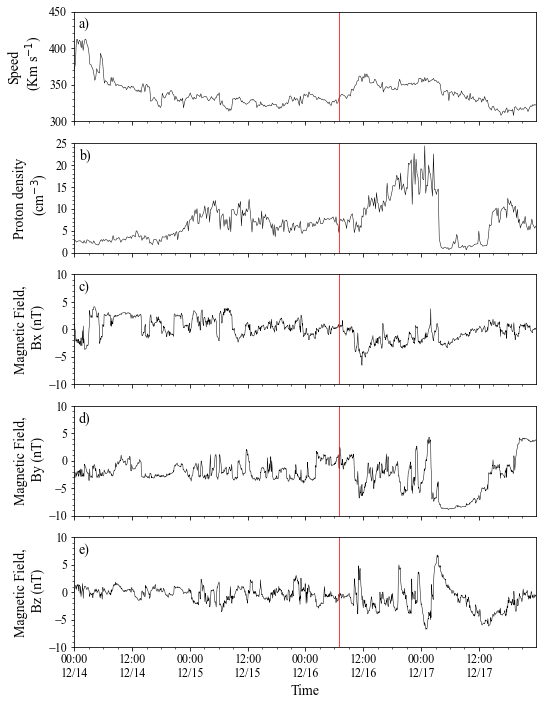

In [3]:
ace.plotACEinsitudata(arrivaltime = "2008-12-16 07:00:00", save=True, saveformat='pdf')

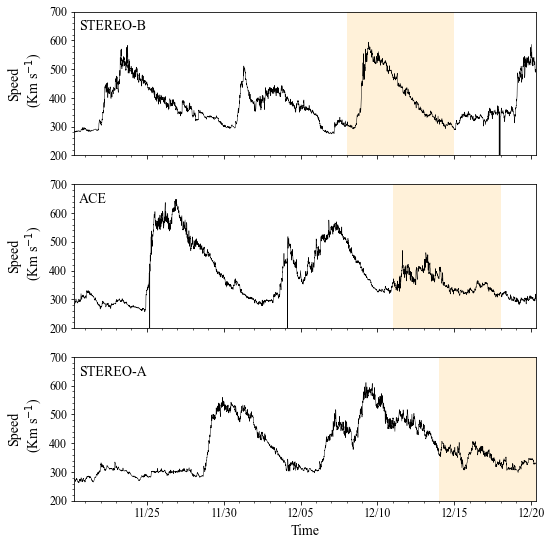

In [3]:
# Highlighting a period in time that the fast-stream should be seen in all spacecraft  
ace.plotACEandSTEREOinsitudata(arrivaltime = "2008-12-16 07:00:00", save=True, saveformat='pdf')

In [68]:
def plot_timeestimates_onACEinsitudata(arrivaltimes, arrivaluncertainties, save=False, saveformat='pdf'):
    """
    Plot the in-situ data from ACE for the December 12th CME. We have downloaded data from //cdaweb.gsfc.nans.gov and used the following instruments:
        • AC_H2_MFI for the magnetic field in GSE coordinates at 1-hour intervals
        • AC_H6_SWI for the proton density and speed at 12-minute intervals 
        • [NO LONGER USED] --- AC_H2_SWE for the solar wind bluk speek at 1-hour intervals () --- 
    """

    # We load the .csv data in panda dataframes for easy data access
    
    # Load in ACE MAGNETIC observation
    df_aceMAG = pd.read_csv(r"AC_H1_MFI_91226.csv")
    df_aceMAG = df_aceMAG.rename(columns={'EPOCH__yyyy-mm-ddThh:mm:ss.sssZ' : 'time',
                                          'BX_GSE_(@_x_component_)_nT':'Bx (nT)',
                                          'BY_GSE_(@_y_component_)_nT':'By (nT)',
                                          'BZ_GSE_(@_z_component_)_nT':'Bz (nT)'})
    df_aceMAG['time'] = pd.to_datetime(df_aceMAG['time'])

    # Load in ACE PROTON DENSITY observation
    df_aceDEN = pd.read_csv(r"AC_H6_SWI_226960.csv")
    df_aceDEN = df_aceDEN.rename(columns={'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ' : 'time',
                                          'PROTON_DENSITY_#/cm^3':'proton density (/cm3)'})
    df_aceDEN['time'] = pd.to_datetime(df_aceDEN['time'])

    # Load in ACE SOLAR WIND SPEED observation
    df_aceSWS = pd.read_csv(r"AC_H6_SWI_91226.csv")
    df_aceSWS = df_aceSWS.rename(columns={'EPOCH_yyyy-mm-ddThh:mm:ss.sssZ' : 'time',
                                          'PROTON_SPEED_km/s':'Speed (km/s)'})
    df_aceSWS['time'] = pd.to_datetime(df_aceSWS['time'])

    # Define the arrival time of the CME - this will be plotted as a red line later in the script
    if len(arrivaltimes) != 3:
        print("three arrival times arguements required: BRaVDA-HUXt 30, BRaVDA-HUXT 8, MAS-HUXt 30")
        return
    time1, time2, time3 = arrivaltimes
    arrival1 = Time(time1, format='iso').datetime
    arrival2 = Time(time2, format='iso').datetime
    arrival3 = Time(time3, format='iso').datetime
    
    if len(arrivaluncertainties) != 3:
        print("three arrival times uncertanties arguements required [unit: HOURS]: BRaVDA-HUXt 30, BRaVDA-HUXT 8, MAS-HUXt 30")
        return
    error1, error2, error3 = arrivaluncertainties
    error1 = timedelta(hours=error1)
    error2 = timedelta(hours=error2)
    error3 = timedelta(hours=error3)

    # Setup figure

    plt.rcParams.update({'font.size': 22, 'axes.labelsize':14, 'legend.fontsize':10,'xtick.labelsize': 12.0,'ytick.labelsize': 12.0,"font.family":"Times New Roman"})
    fig, axs = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(8, 8)) # Paper size is equal to A4 portrait

    axs[0].set_ylabel("Speed\n  (Km s$^{-1}$)")
    axs[0].plot(df_aceSWS["time"],df_aceSWS["Speed (km/s)"], 'k', lw=0.5)
    axs[0].set_ylim(bottom=300, top=450)
    axs[0].yaxis.set_major_locator(MultipleLocator(50))
    axs[0].yaxis.set_minor_locator(MultipleLocator(10))

    axs[1].set_ylabel("Proton density\n  (cm$^{-3}$)")
    axs[1].plot(df_aceDEN["time"],df_aceDEN["proton density (/cm3)"], 'k', lw=0.5)
    axs[1].set_ylim(bottom=0, top=25)
    axs[1].yaxis.set_major_locator(MultipleLocator(5))
    axs[1].yaxis.set_minor_locator(MultipleLocator(1))

    axs[2].set_ylabel("Magnetic Field,\n (nT)")
    axs[2].plot(df_aceMAG["time"],df_aceMAG["Bx (nT)"], 'k', lw=0.5, label="Bx")
    axs[2].set_ylim(bottom=-10.0, top=10)
    axs[2].yaxis.set_major_locator(MultipleLocator(5))
    axs[2].yaxis.set_minor_locator(MultipleLocator(1))

#     axs[3].set_ylabel("Magnetic Field,\n By (nT)")
    axs[2].plot(df_aceMAG["time"],df_aceMAG["By (nT)"], 'k:', lw=0.5, label="By")
#     axs[3].set_ylim(bottom=-10, top=10)
#     axs[3].yaxis.set_major_locator(MultipleLocator(5))
#     axs[3].yaxis.set_minor_locator(MultipleLocator(1))

#     axs[4].set_ylabel("Magnetic Field,\n Bz (nT)")
    axs[2].plot(df_aceMAG["time"],df_aceMAG["Bz (nT)"], '--',color='gray', lw=0.5, label="Bz")
#     axs[4].set_ylim(bottom=-10, top=10)
#     axs[4].yaxis.set_major_locator(MultipleLocator(5))
#     axs[4].yaxis.set_minor_locator(MultipleLocator(1))
    axs[2].legend(ncol=3, loc="righttop")


    axs[2].set_xlabel("Time")
    axs[2].set_xlim(left= Time("2008-12-15 12:00:00", format='iso').datetime , right= df_aceDEN.time.max())
    axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M\n%m/%d'))
    axs[2].xaxis.set_minor_locator(mdates.HourLocator(interval=3))

    for nn, ax in enumerate(axs):
        ax.axvline(x=arrival1, ymin=-10, ymax=10,color='b', lw=0.75)
        ax.axvline(x=arrival2, ymin=-10, ymax=10,color='r', lw=0.75)
        ax.axvline(x=arrival3, ymin=-10, ymax=10,color='y', lw=0.75)
        
        ax.axvspan(arrival1-error1, arrival1+error1, alpha=0.3, color='b',lw=0)
        ax.axvspan(arrival2-error2, arrival2+error2, alpha=0.3, color='r',lw=0)
        ax.axvspan(arrival3-error3, arrival3+error3, alpha=0.3, color='y',lw=0)


    plt.show()

    if save:
        project_dirs = H._setup_dirs_()

        filename = "12Dec08CME_ACEobservationsVsEnsembleEstimate_plot.{}".format(saveformat)
        filepath = os.path.join(project_dirs['HUXt_figures'], filename)            
        fig.savefig(filepath, dpi=300, bbox_inches='tight')


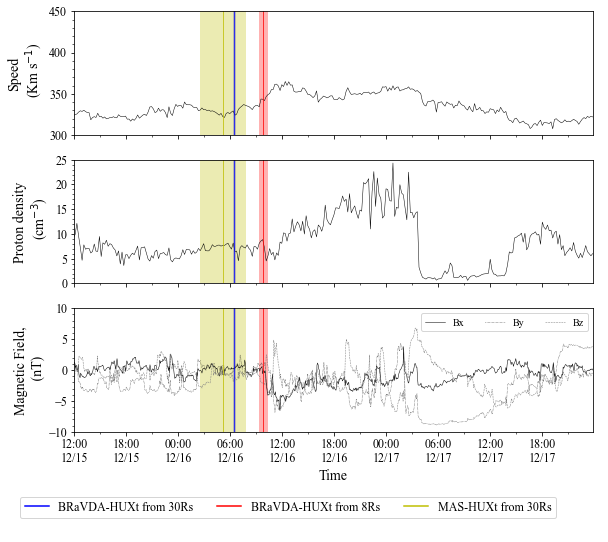

In [2]:
# Showing the estimated arrival time, based on ensemble analysis, on in-situ data
arrivaltimes = "2008-12-16 06:28:06", "2008-12-16 09:48:40", "2008-12-16 05:08:19"
arrivaluncertainties = 0.18, 0.53, 2.67
ace.plot_timeestimates_onACEinsitudata(arrivaltimes, arrivaluncertainties,leadtime="(all)60", save=True, saveformat='pdf')

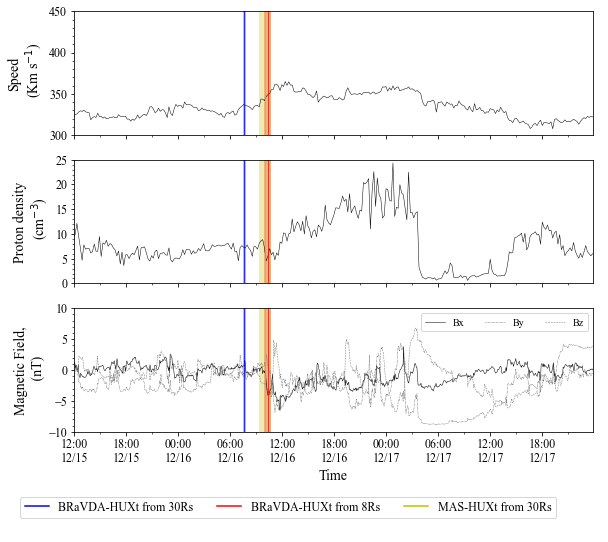

In [3]:
arrivaltimes = "2008-12-16 07:38:17", "2008-12-16 10:18:14", "2008-12-16 09:59:51"
arrivaluncertainties = 0.17, 0.44, 0.71
ace.plot_timeestimates_onACEinsitudata(arrivaltimes, arrivaluncertainties,leadtime=72, save=True, saveformat='pdf')

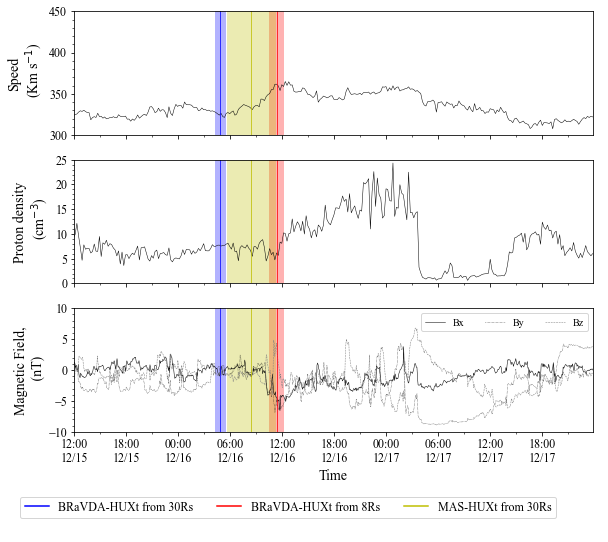

In [4]:
arrivaltimes = "2008-12-16 04:51:23", "2008-12-16 11:20:20", "2008-12-16 08:26:04"
arrivaluncertainties = 0.63, 0.84, 2.85
ace.plot_timeestimates_onACEinsitudata(arrivaltimes, arrivaluncertainties,leadtime="(min)84", save=True, saveformat='pdf')